# Pymaceuticals Inc.
---

### Analysis

- Based on the reduction of tumor volume, Capomulin and Ramicane reginems are most effective.
- Due to large variances in data, Ketapril and Naftisol produce inaccurate data based on Standard Deviation.
- According to data derived from Capomulin study, average weight and tumor volume are directly proportionate.
- Gender is not a factor as a bias in treatment results.
 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results,mouse_metadata, on = "Mouse ID", how='left')
    
# Display the data table for preview
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [27]:
# Checking the number of mice.
mice_count = len(df["Mouse ID"].unique())
mice_count

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = df.loc[df['Mouse ID'] == 'g989']
duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df3 = df[df['Mouse ID'].isin(duplicate_mouse_ids) == False]
df3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [31]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(df3["Mouse ID"].unique())
mice_count

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = df3.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = df3.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance = df3.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
stdev = df3.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = df3.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame({"Mean": mean,
                              "Median": median,
                              "Variance": variance,
                              "Standard Deviation": stdev,
                              "Standard Error of Mean": sem})
summary_stat

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stat2 = df3.groupby('Drug Regimen').agg({"Tumor Volume (mm3)" :['mean','median','var','std','sem']})
summary_stat2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

[Text(0, 0.5, 'Number of Mice Tested')]

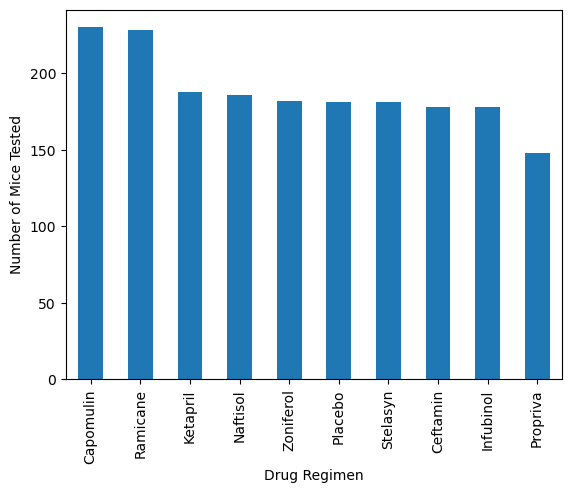

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

panda_barplotdf = df3.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

panda_barplot=panda_barplotdf.plot(kind='bar')
panda_barplot.set(ylabel='Number of Mice Tested')

Text(0, 0.5, 'Number of Mice Tested')

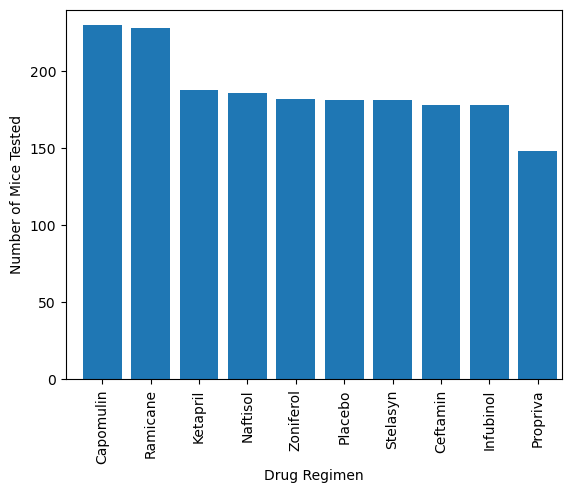

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
number_tested = df3.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
drugs= number_tested.index
plt.bar(range(len(drugs)),number_tested)
plt.xlim(-0.75,9.5)
plt.ylim(0, max(number_tested)+10)
plt.xticks(range(len(drugs)),drugs ,rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')


<AxesSubplot:ylabel='Sex'>

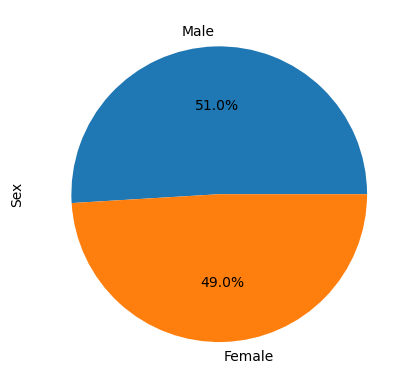

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = df3['Sex'].value_counts()

panda_pie=gender_count.plot.pie(autopct='%1.1f%%')

panda_pie

Text(0, 0.5, 'Sex')

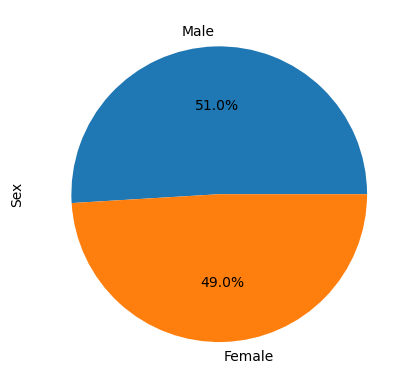

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_labels = df3.sort_values(by=['Sex'],ascending=False)['Sex'].unique()

plt.pie(gender_count,labels=pie_labels,autopct='%1.1f%%')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_df = df3[df3['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
mouse_group = treatment_df.groupby("Mouse ID")
final_timepoint = mouse_group['Timepoint'].max()
merged_df = pd.merge(treatment_df, final_timepoint.reset_index(), on=['Mouse ID','Timepoint'])
merged_df.rename(columns={'Tumor Volume (mm3)':'Final Tumor Volume (mm3)'}, inplace=True)

In [39]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments=merged_df["Drug Regimen"].unique()
tumor_volume=[]
capomulin_outliers=[]
ramicane_outliers=[]
infubinol_outliers=[]
ceftamin_outliers=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for drugs in treatments:
    tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == drugs, 'Final Tumor Volume (mm3)']

    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    if drugs == 'Capomulin':
        capomulin_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
        print(f'The IQR for {drugs} is: {iqr}\n The outliers are: {capomulin_outliers}')
    elif drugs == 'Ramicane':
        ramicane_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
        print(f'The IQR for {drugs} is: {iqr}\n The outliers are: {ramicane_outliers}')
    elif drugs=='Infubinol':
        infubinol_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
        print(f'The IQR for {drugs} is: {iqr}\n The outliers are: {infubinol_outliers}')
    elif drugs=='Ceftamin':
        ceftamin_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
        print(f'The IQR for {drugs} is: {iqr}\n The outliers are: {ceftamin_outliers}')    

The IQR for Ceftamin is: 15.577752179999997
 The outliers are: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
The IQR for Infubinol is: 11.477135160000003
 The outliers are: 4    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
The IQR for Ramicane is: 9.098536719999998
 The outliers are: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
The IQR for Capomulin is: 7.781863460000004
 The outliers are: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

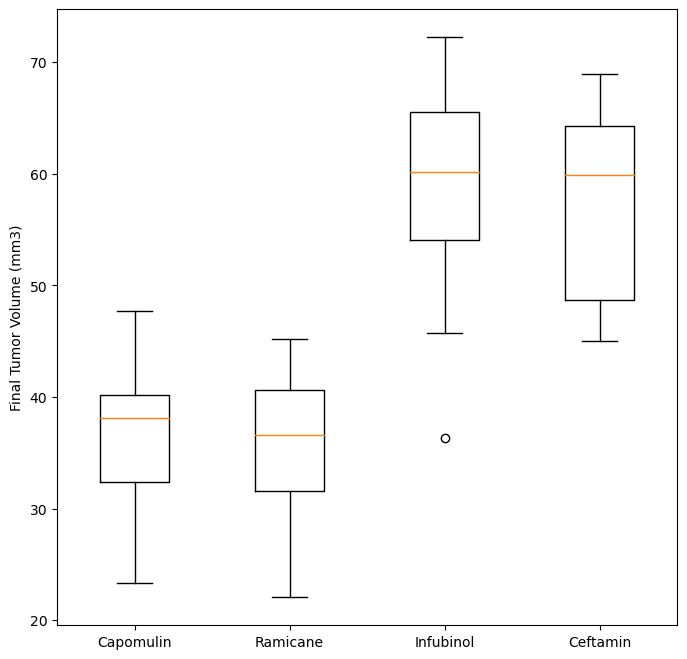

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_capomulin = merged_df[merged_df['Drug Regimen'] == 'Capomulin']['Final Tumor Volume (mm3)']
data_ramicane = merged_df[merged_df['Drug Regimen'] == 'Ramicane']['Final Tumor Volume (mm3)']
data_infubinol = merged_df[merged_df['Drug Regimen'] == 'Infubinol']['Final Tumor Volume (mm3)']
data_ceftamin = merged_df[merged_df['Drug Regimen'] == 'Ceftamin']['Final Tumor Volume (mm3)']

fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot([data_capomulin, data_ramicane, data_infubinol, data_ceftamin], labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.set_ylabel('Final Tumor Volume (mm3)')


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

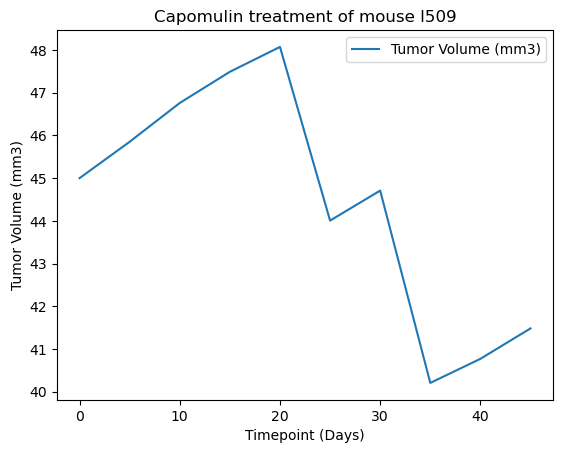

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
graph1 = df3[df3['Mouse ID'] == 'l509'][['Tumor Volume (mm3)','Timepoint']]

graph1.plot.line(x='Timepoint',y='Tumor Volume (mm3)',title='Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

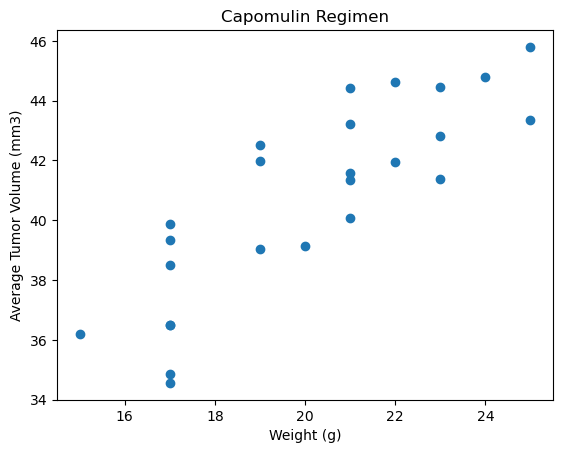

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df=df3[df3['Drug Regimen']=='Capomulin']
scatter_df=scatter_df.filter(['Mouse ID','Weight (g)'])
x_values = scatter_df.groupby('Mouse ID').mean()
scatter_df2=df3[df3['Drug Regimen']=='Capomulin']
scatter_df2=scatter_df2.filter(['Mouse ID','Tumor Volume (mm3)'])
y_values = scatter_df2.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(x_values,y_values)
plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

The correlation between weight and tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

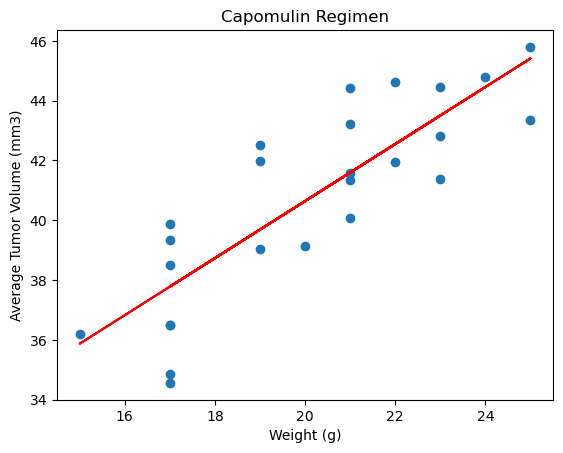

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

scatter_df=df3[df3['Drug Regimen']=='Capomulin']
scatter_df=scatter_df.filter(['Mouse ID','Weight (g)'])
x_values = scatter_df.groupby('Mouse ID').mean()
scatter_df2=df3[df3['Drug Regimen']=='Capomulin']
scatter_df2=scatter_df2.filter(['Mouse ID','Tumor Volume (mm3)'])
y_values = scatter_df2.groupby('Mouse ID').mean()

correlation=st.pearsonr(x_values['Weight (g)'],y_values['Tumor Volume (mm3)'])
print(f'The correlation between weight and tumor volume is {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values['Weight (g)'], y_values['Tumor Volume (mm3)'])
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12.0,25.0),fontsize=15,color="red")
plt.title('Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')